<center>
    <br />
    <h1>Eine Einführung in Machine Learning mit Scikit-Learn</h1>
    <br /><br />
</center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:

import tutorial

## Voraussetzungen 

In [3]:
print("Hello pascal")

Hello pascal


In [4]:
# Das ist ein Jupyter notebook, mit ausführbarem Python-code
42 / 2

21.0


- Wir brauchen Python distribution mit wissenschaftlichen Paketen (NumPy, SciPy, Scikit-Learn, Pandas)
    

In [5]:
# Globale Importe und Einstellungen

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Ausdruck Optionen
import numpy as np
np.set_printoptions(precision=3)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 768, 'scroll': True, 'theme': 'simple'})

# Ignoriere Warnungen
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

In [6]:
%%javascript
Reveal.addEventListener("slidechanged", function(event){ window.location.hash = "header"; });

<IPython.core.display.Javascript object>

# Inhalt

* Scikit-Learn und die dazugehörigen Pakete in Python
* Klassifikation
* Modellevaluation und Auswahl
* Transformationen, Pipelines und Featurebearbeitung
* Zusammenfassung

# Scikit-Learn

## Überblick

* Machine learning library geschrieben in __Python__
* __Einfach und effizient__, für Experten und Experts-to-be
* Klassische, __bekannte Machine Learning Algorithmen__
* Kommt mit guter <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> und <a href="http://scikit-learn.org/dev/auto_examples/index.html">Beispielen</a>
* __BSD 3 license__

## Community driven development

- 20~ core Entwickler (die meisten Wissenschafter)
- 500-1000 gelegentliche Mitwirkende
- Hauptaugenmerk auf __keeping the project maintainable__
    - Konsistenz im (Programmier)stil
    - Unit-Tests
    - Dokumentation und Beispiele
    - Code Überprüfung
- Reif und stabile Code-Basis

## Algorithmen

__Supervised learning:__

* Lineare Modelle (Ridge, Lasso, Elastic Net, ...)
* Support Vektor Maschinen
* Baum-basierende Methodsen (Random Forests, Bagging, GBRT, ...)
* Nearest neighbors 
* Neural Netzwerke (basics)
* Gauss'sche Prozesse
* Feature Selektion

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix Dekomposition (PCA, ICA, ...)
* Density (Dichte) Schätzung
* Outlier Detektion

__Modellauswahl und Evaluation:__

* Cross-validation
* Grid-search
* Eine grosse Menge an Metriken

_... und vieles mehr!_ ([Reference](http://scikit-learn.org/dev/modules/classes.html))

# Klassification

## Framework

Daten kommen als (endliches) Lernset ${\cal L} = (X, y)$ wo
* Eingabe samples als array $X$ mit Anzahl `n_samples` $\times$ `n_features`, wo die Werte in ${\cal X}$ repräsentiert sind,
* Ausgabewerte als array $y$, die _symbolische_ Werte in ${\cal Y}$ annehmen können.

Das Ziel der überwachten Klassifikation (supervised classification) ist es einen Schätzer/Klassifikator/estimator zu bauen $\varphi: {\cal X} \mapsto {\cal Y}$ der folgenden Fehler minimiert

$$
Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}
$$

wo $\ell$ eine Verlust/Kostenfunktion (loss function) darstellt, e.g., die zero-one loss für Klassifikation $\ell_{01}(Y,\hat{Y}) = 1(Y \neq \hat{Y})$.

## Anwendungen

- Diagnose von Krankheiten anhand von Symptomen;
- Katzenerkennung in Bildern;
- Identifikation von Körpertielin mit Kinect Kameras;
- ...
  

## Data 

- Eingabedaten = Numpy arrays oder Scipy sparse matrices ;
- Algorithmen werden als High-level Operationen definiert auf Basis von Matrizen oder Vektoren (ähnliche wie MATLAB) ;

In [7]:
# Generiere Daten
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=20, random_state=42)
labels = ["b", "r"]
y = np.take(labels, (y < 10))
print(X) 
print(y[:5])

[[ 4.206 -0.552]
 [ 2.314 -8.493]
 [-3.546  0.102]
 ...
 [-9.634 10.064]
 [-3.626  2.95 ]
 [ 3.857  1.651]]
['b' 'b' 'r' 'r' 'b']


In [8]:
# X ist ein 2 dimensionales Array, mit 1000 Zeilen und 2 Spalten
print(X.shape)
 
# y ist ein Vektor mit 1000 Elementen
print(y.shape)

(1000, 2)
(1000,)


In [9]:
# Auf Zeilen und Spalten kann mit Listen, Slices oder Masken zugegriffen werden
print(X[[1, 2, 3]])     # Zeile 1, 2 und 3
print(X[:5])            # Erste 5 Zeilen
print(X[500:510, 0])    # Werte von Zeile 500 bis Zeile 510 der Spalte 0
print(X[y == "b"][:5])  # Erste 5 Zeilen, wo y = b

[[ 2.314 -8.493]
 [-3.546  0.102]
 [ 3.449  2.63 ]]
[[ 4.206 -0.552]
 [ 2.314 -8.493]
 [-3.546  0.102]
 [ 3.449  2.63 ]
 [-9.091  8.055]]
[ 4.809  8.57   9.502  8.498  1.915  0.665  2.444 -3.616  6.329  1.323]
[[ 4.206 -0.552]
 [ 2.314 -8.493]
 [-9.091  8.055]
 [ 2.387 -6.845]
 [-0.709  4.29 ]]


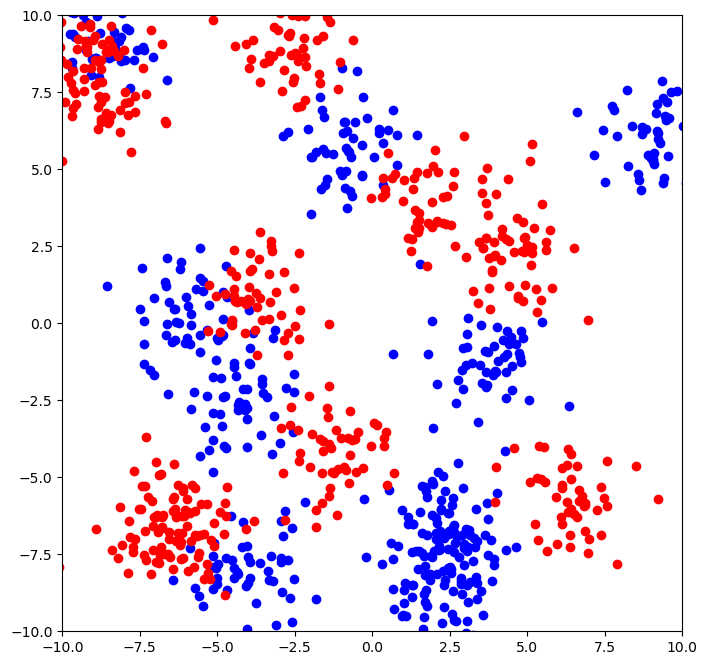

In [10]:
# Plot
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## Laden von externen Daten

- Numpy stellt [einfache Werkzeuge](https://docs.scipy.org/doc/numpy/reference/routines.io.html) zum Laden von Daten von Dateien (CSV, binary, etc) zur Verfügung;

- Für strukturierte Daten gibt es Pandas  [fortgeschrittene Werkzeuge](http://pandas.pydata.org/pandas-docs/stable/io.html) (CSV, JSON, Excel, HDF5, SQL, etc);

## Eine einfache und einheitliche API

Alle Lernalgorithmen in scikit-learn teilen eine einheitliche und begrenzte API die aus folgenden sich ergänzenden Schnittstellen besteht:

- Ein `estimator` interface zum Erstellen und Trainieren von Modellen;
- Ein `predictor` interface für Klassifikation/Regression;
- Ein `transformer` interface zum Konvertieren und Umformen von Daten.

Ziel: erzwinge eine einfache und konsistente API um __das Austauschen von Algorithmen möglichst einfach zu gestalten__. 

### Estimator

In [11]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self

In [12]:
# Importiere die Nächste Nachbarn (Nearest Neighbors) Klasse
from sklearn.neighbors import KNeighborsClassifier  # Verändere das um andere Algorithmen zu Probieren 
                                        

# Setze Hyper-parameter, zur Steuerung des Algorithmus
clf = KNeighborsClassifier(n_neighbors=3)

# Lerne ein Modell auf Basis der Trainingsdaten
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [13]:
# Estimator Status wird in Attributen abgespeichert
clf._tree

### Predictor

In [14]:
# Klassifiziere  
print(clf.predict(X[:5])) 

['b' 'b' 'r' 'r' 'r']


In [15]:
# Berechne (annähernde) Klassewahrscheinlichkeiten
print(clf.predict_proba(X[:5]))

[[1.    0.   ]
 [1.    0.   ]
 [0.    1.   ]
 [0.    1.   ]
 [0.333 0.667]]


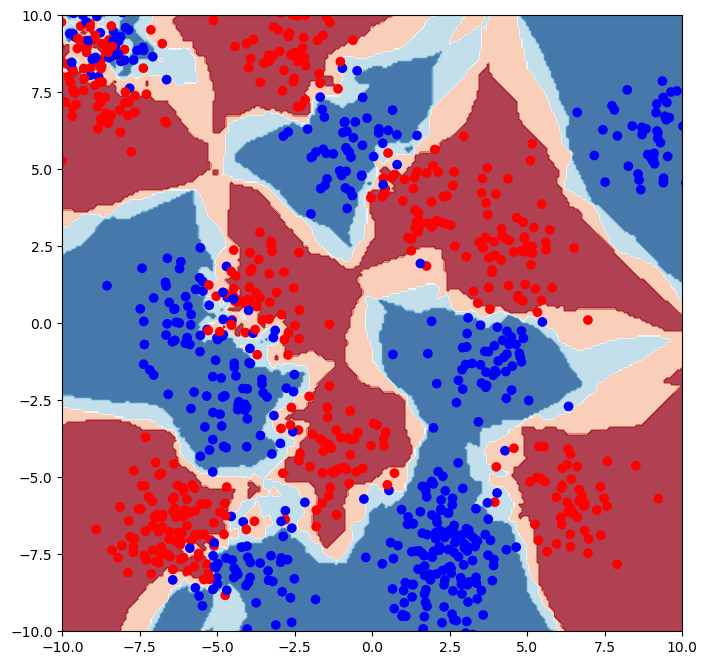

In [16]:
from tutorial import plot_surface    
plot_surface(clf, X, y)

AttributeError: 'Rectangle' object has no property 'normed'

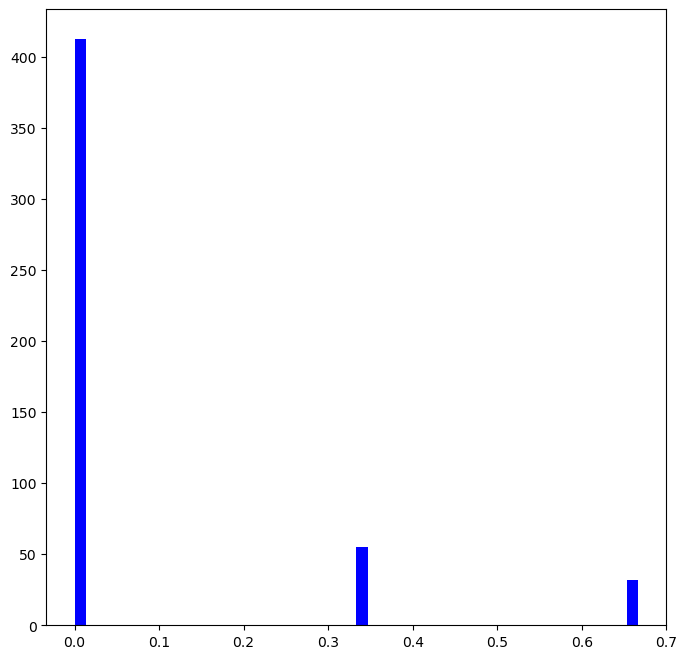

In [17]:
from tutorial import plot_histogram    
plot_histogram(clf, X, y)

## Klassifizierer Zoo

### Entscheidungsbäume (Decision trees)

Idee: Erzeuge eine Partition des Eingaberaumes unter Verwendung von zur Featureachse orthogonalen Teilungen.

AttributeError: 'Rectangle' object has no property 'normed'

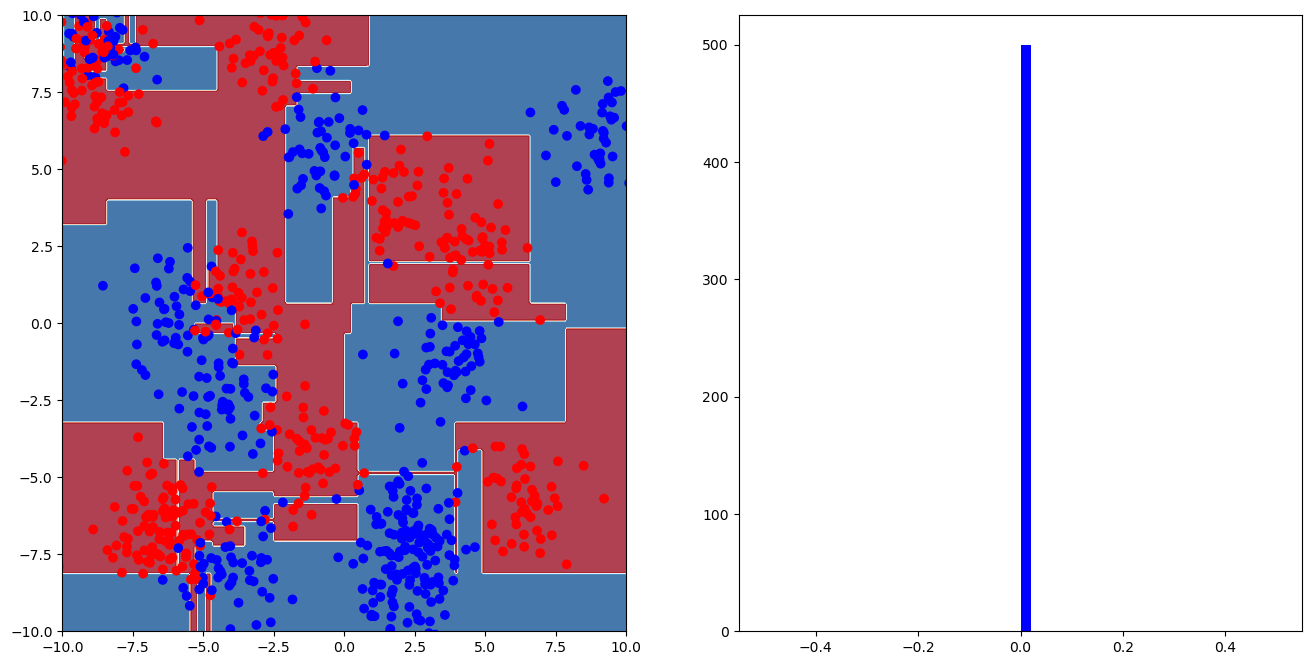

In [18]:
from tutorial import plot_clf
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

### Random Forests

Idee: Erzeuge verschiedene Entscheidungsbäume (decision trees) mit kontrollierter Randomness und nimm den Durchschnitt der Entscheigungen.

AttributeError: 'Rectangle' object has no property 'normed'

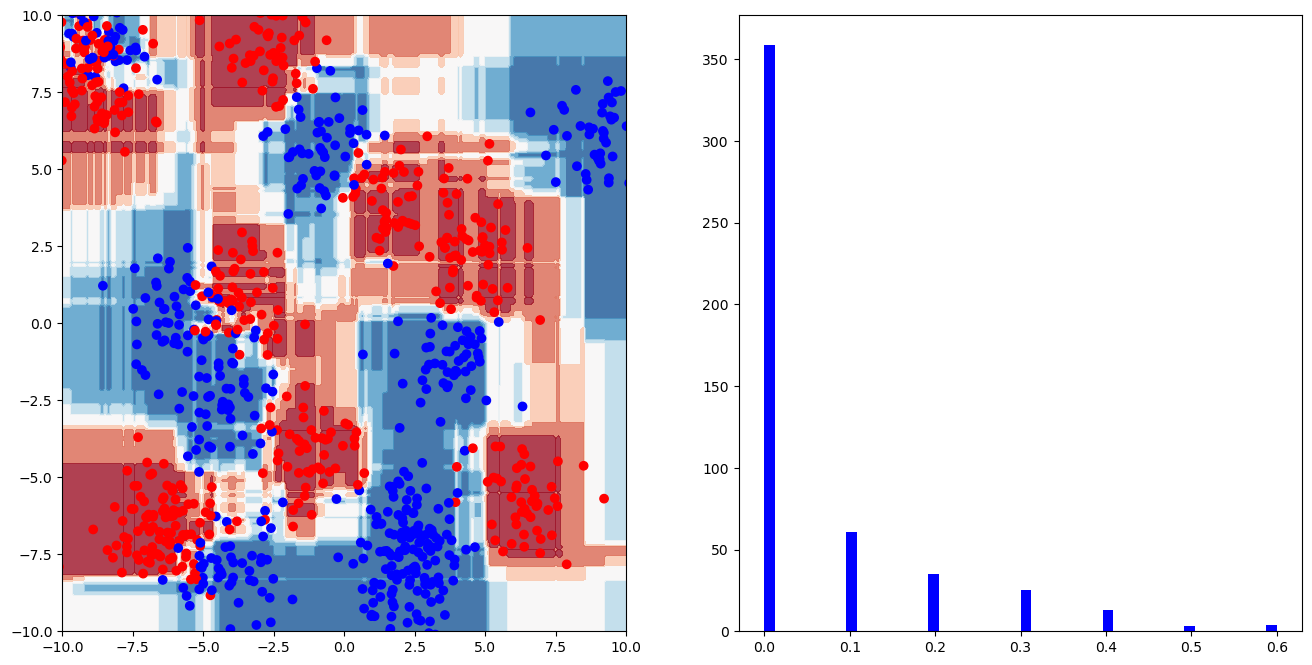

In [19]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=10)

clf.fit(X, y)
plot_clf(clf, X, y)

### Logistische Regression

Idee: Modelliere eine Unterteilung als Hyperebene.

AttributeError: 'Rectangle' object has no property 'normed'

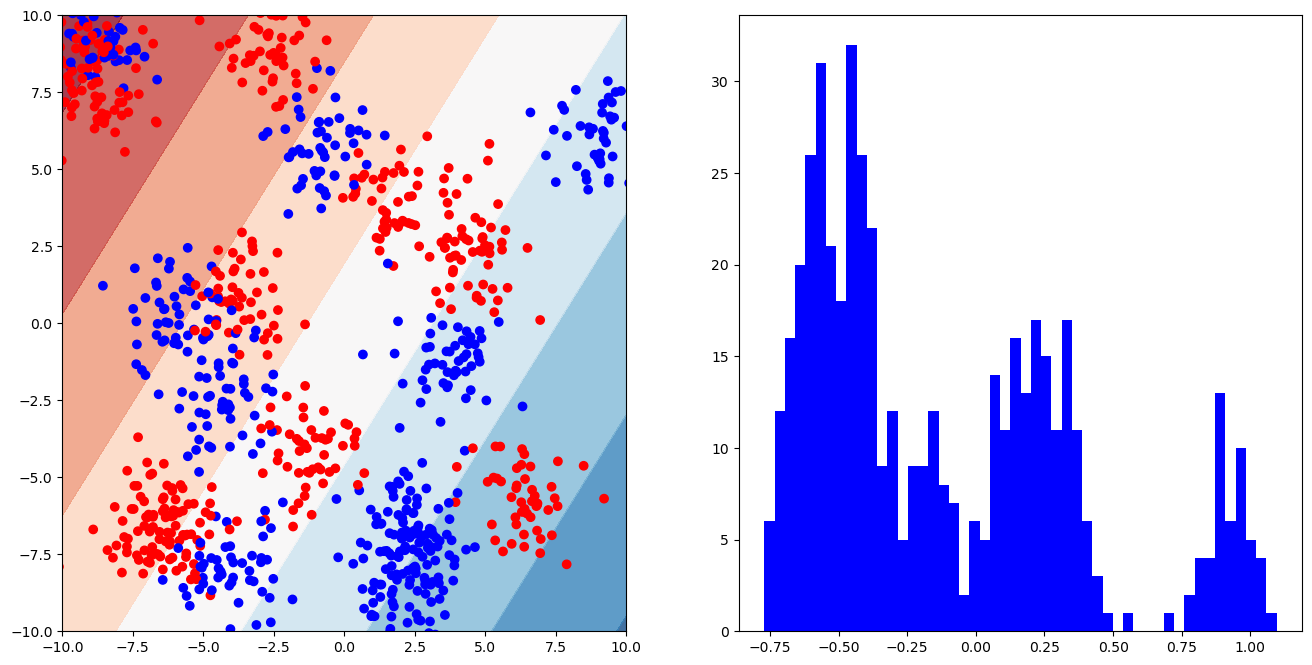

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X, y)
plot_clf(clf, X, y)

### Support Vektor Maschinen

Idee: Finde eine Hyperebene, die die grösste Distanz zum nächsten Trainingspunkt von jeder beliebigen Klasse hat.

AttributeError: 'Rectangle' object has no property 'normed'

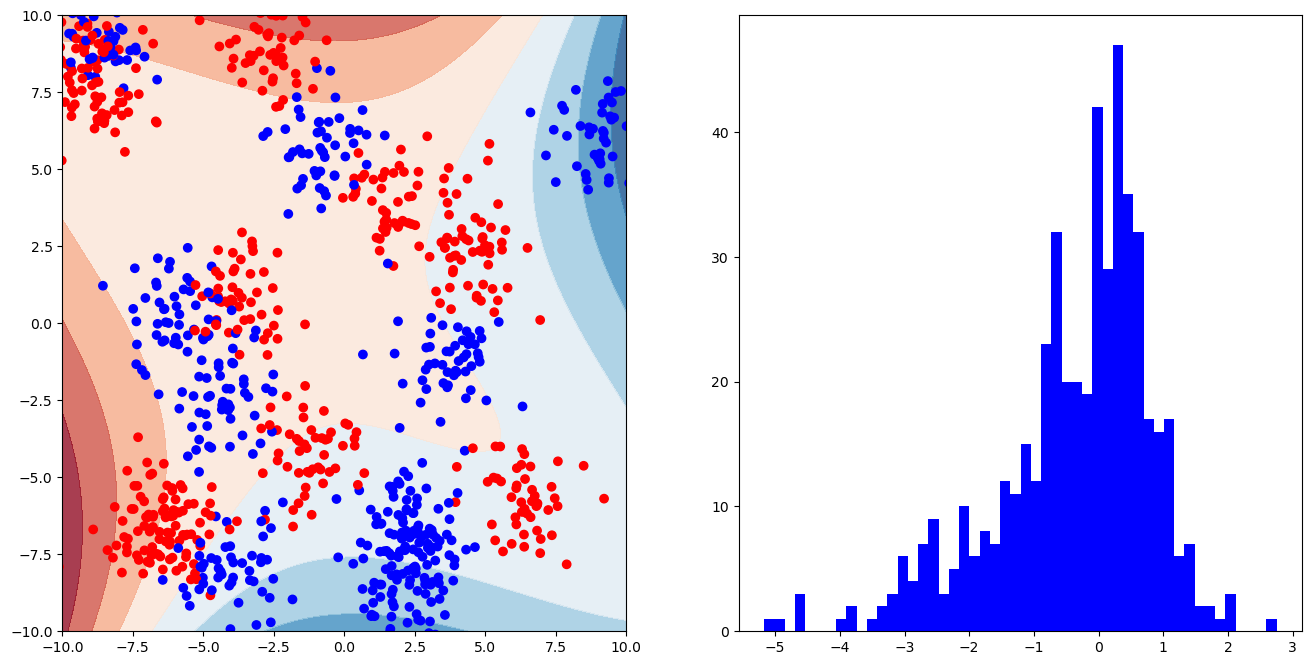

In [21]:
from sklearn.svm import SVC
clf = SVC(kernel="poly")  # try kernel="rbf" instead
clf.fit(X, y)
plot_clf(clf, X, y)

### Multi-layer Perzeptron

Idee: Ein multi-layer Perzeptron ist eine Anzahl nicht-linearer Kombinationen der Eingangsdaten.

AttributeError: 'Rectangle' object has no property 'normed'

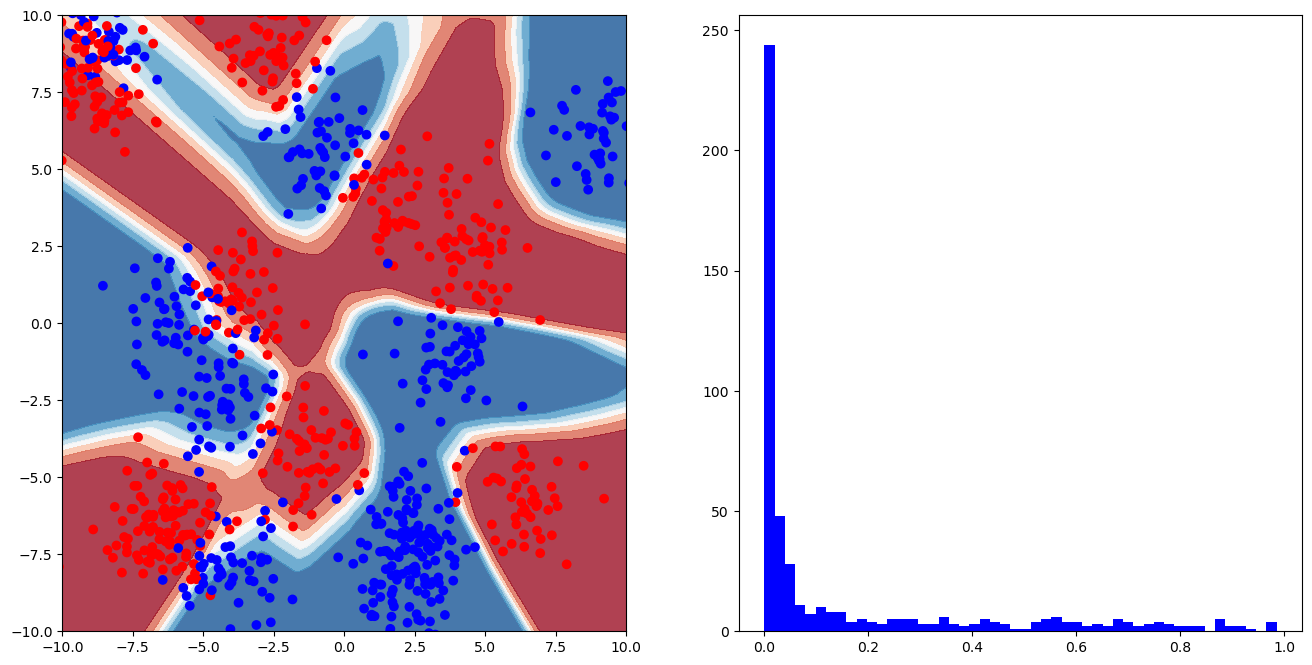

In [22]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50, 70, 30), activation="relu", learning_rate="invscaling")
clf.fit(X, y)
plot_clf(clf, X, y)

# Modell Evaluation und Auswahl

## Evaluation

- Wir wollen einen Estimator $\varphi$ der den Generalisierungs Fehler $Err(\varphi) = \mathbb{E}_{X,Y}\{ \ell(Y, \varphi(X)) \}$ minimiert.

- Problem: Da $P_{X,Y}$ nicht bekannt ist, kann der Generalisierungs Fehler  $Err(\varphi)$ nicht ausgewertet werden.

- Lösung: Finde eine angenäherte Lösung von $Err(\varphi)$.

## Trainingsfehler

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
print("Training error =", zero_one_loss(y, clf.predict(X)))

Training error = 0.0


## Testfehler

Herausforderung: Der Trainingsfehler ist eine __statistisch verzerrte (biased)__ Annäherung des Generalisierungsfehlers.

Lösung: Teile ${\cal L}$ in zwei disjunkte Teile genannt training und test sets (üblicherweise 70% für training und 30% für test).
- Verwende das training set für ds Modellfitting (Training);
- Verwende das test set zur Evaluation, damit erreiche wir eine geringer verzerrte (unbiased) Schätzung.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.07066666666666666
Test error = 0.08799999999999997


Zusammenfssung: Achte auf die statistische Verzerrung (_bias_) wenn die Modellperformanz bewertet wird:
- Training score ist sehr oft eine optimistische Schätzung der wahren Performanz;
- __Niemals die gleichen Daten für für Training und Evaluation verwenden!__

## Cross-validation

Herausforderung: 
- Wenn ${\cal L}$ klein ist, kein ein 70% Anteil der Trainingsdaten zu einem Modell führen, dass sich signifikant vom Modell unterscheiden, das auf dem gesamten Datensatz  ${\cal L}$ trainiert wurde. 
- Dennoch, den Anteil von 70% zu erhöhen (d.h. Verringerung des test sets), kann zu einem ungenaueren Generalisierungsfehlers führen. 

Lösung: K-fache Kreuzvalidierung (cross-validation). 
- Teile ${\cal L}$ in K kleine disjunkte Blöcke. 
- Trainiere K-1 Blöcke, evaluiere den Testfehler am hold-out Block.
- Wiederhole für alle Kombination und bilde den Durchschnitt der unterschiedlichen Generalisierungsfehler.

<center>![](cross-validation.png)</center>

In [25]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_splits=5, random_state=42).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(zero_one_loss(y_test, clf.predict(X_test)))

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [26]:
# Kurzversion
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

## Metriken (metrics)

### Default Score

Estimators kommen immer mit einem default Evaluation Score
* Genauigkeit (Accuracy) for Klassification 
* R2 Score für Regression

In [ ]:
y_train = (y_train == "r")
y_test = (y_test == "r")
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

Default score = 0.905


### Genauigkeit

Definition: Die Genauigkeit ist der Anteil an richtigen Klassifikationen (predictions).

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy =", accuracy_score(y_test, clf.predict(X_test)))

Accuracy = 0.84


### Precision, Recall und F-Measure

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$
$$F = \frac{2 * Precision * Recall}{Precision + Recall}$$

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
print("Precision =", precision_score(y_test, clf.predict(X_test)))
print("Recall =", recall_score(y_test, clf.predict(X_test)))
print("F =", fbeta_score(y_test, clf.predict(X_test), beta=1))

Precision = 0.8804347826086957
Recall = 0.9101123595505618
F = 0.8950276243093923


### ROC AUC

Definition: Fläche unter der Kurve der false positive rate (FPR) gegen die true positive rate (TPR) als Entscheidungsgrenze für den Klassifikator (Estimator).

ROC AUC = 0.9297744360902256


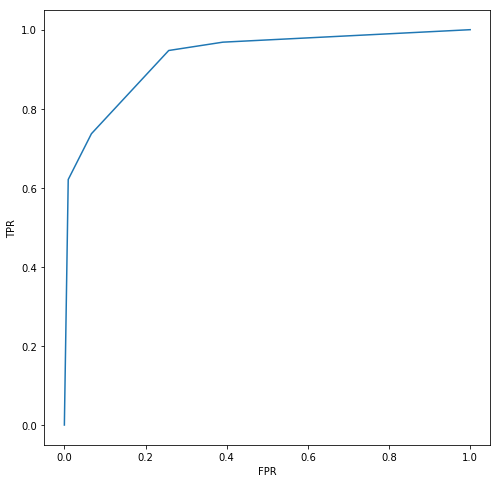

In [ ]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer("roc_auc")
print("ROC AUC =", roc_auc_scorer(clf, X_test, y_test))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### Konfusionsmatrix (confusion matrix)

Definition: Anzahl an Samples von Klasse  $i$ die als Klasse $j$ klassifiziert wurden.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[86, 19],
       [13, 82]])

## Modellauswahl
 
- Finde gute Hyper-parameter ist entscheidend zur Steuerung des under- and over-fitting (i.e. Erzielung besser Performanz).
- Der geschätzte Generalisierungsfehler wird verwendet, um das beste Modell auszuwählen.

## Under- und over-fitting

- Under-fitting: Das Modell ist zu einfach und kann den wahren Zusammenhang zwischen X und y nicht erfassen.
- Over-fitting: Das Modell ist zu komplex bzw. zu Trainingsdaten-spezifisch und generalisiert zu wenig.

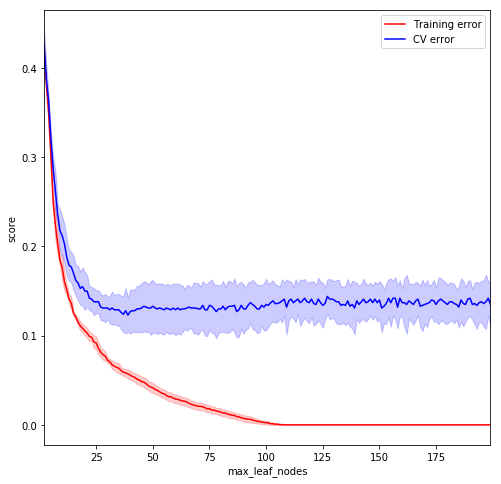

In [ ]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = range(2, 200)
param_name = "max_leaf_nodes"

train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best")

In [ ]:
# Der beste trade-off
print("%s = %d, CV error = %f" % (param_name,
                                  param_range[np.argmax(test_scores_mean)],
                                   1. - np.max(test_scores_mean)))

max_leaf_nodes = 36, CV error = 0.177000


Frage: Wo befinden sind die under-fitting und over-fitting Bereiche?

Frage: Was bedeutet es, wenn der Trainingsfehler sich vom Testfehler unterscheidet?

## Hyper-parameter Suche

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid={"n_neighbors": list(range(1, 100))},
                    scoring="accuracy",
                    cv=5, n_jobs=-1)
grid.fit(X, y)  # Note that GridSearchCV is itself an estimator

print("Best score = %f, Best parameters = %s" % (1. - grid.best_score_, 
                                                 grid.best_params_))

Best score = 0.131000, Best parameters = {'n_neighbors': 34}


Frage: Should you report the best score as an estimate of the generalization error of the model?

## Auswahl und evaluation, _simultan_

- `grid.best_score_` ist nicht unabhängig vom besten Modell, da ihre Konstruktion von der Optimierung dieses Modells geleitet wurde.
- Das bedeutet, der optiierte `grid.best_score_`  _wird_ tatsächlich biased, zu optimistische, Schätzung der wahren Modellperformanz sein. 

- Lösung: Verwende __verschachtelte (nested)__ cross-validation für die korrekte Auswahl des Modells __and__ correctly Performanzevaluation. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(
            GridSearchCV(KNeighborsClassifier(),
                         param_grid={"n_neighbors": list(range(1, 100))},
                         scoring="accuracy",
                         cv=5, n_jobs=-1), 
            X, y, cv=5, scoring="accuracy")

# Unbiased estimate of the accuracy
print("%f +-%f" % (1. - np.mean(scores), np.std(scores)))

0.144000 +-0.023958


# Transformer, Pipelines und Featurebearbeitung

## Transformers

- Klassifikation (Regression) ist oft nur der letzte (kleine) Schritt eines langen komplizierten Prozesses;
- In den meisten Fällen, müssen die Eingabedaten vorverarbeitet und/oder erweitert werden bevor sie dem Lernalgorithmus gefüttert werden;
- Für diesen Zweck stellt Scikit-Learn die ``transformer`` API zur Verfügung.

In [ ]:
class Transformer(object):    
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self
    
    def transform(self, X):
        """Transform X into Xt."""
        # transform X in some way to produce Xt
        return Xt
    
    # Shortcut
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        Xt = self.transform(X)
        return Xt

## Transformer Zoo

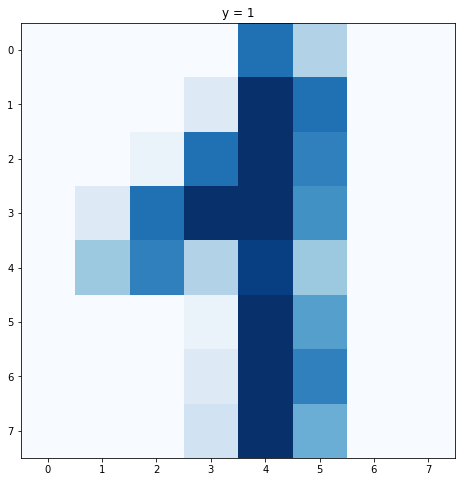

In [ ]:
# Lade den Digits Datensatz
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Plot
sample_id = 42
plt.imshow(X[sample_id].reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.title("y = %d" % y[sample_id])
plt.show()

### Skalierer und andere Normalisierer

In [ ]:
from sklearn.preprocessing import StandardScaler
tf = StandardScaler()
tf.fit(X_train, y_train)
Xt_train = tf.transform(X_train)  
print("Mean (before scaling) =", np.mean(X_train))
print("Mean (after scaling) =", np.mean(Xt_train))

# Kurzversion: Xt = tf.fit_transform(X)
# Siehe auch Binarizer, MinMaxScaler, Normalizer, ...

Mean (before scaling) = 4.8921213808463255
Mean (after scaling) = -2.307813265739004e-18


In [ ]:
# Skalierung ist entscheidend für manche Klassifizierer!!
from sklearn.svm import SVC
clf = SVC()
print("Without scaling =", clf.fit(X_train, y_train).score(X_test, y_test))
print("With scaling =", clf.fit(tf.transform(X_train), y_train).score(tf.transform(X_test), y_test))

Without scaling = 0.4866666666666667
With scaling = 0.9844444444444445


### Feature Auswahl

Shape = (1347, 10)


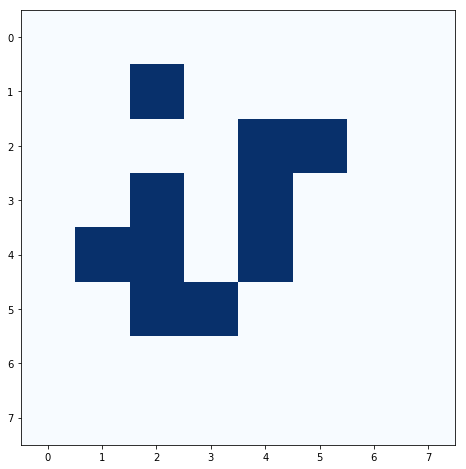

In [ ]:
# Wähle die 10 besten Features, gereiht nach dem ANOVA F-score
from sklearn.feature_selection import SelectKBest, f_classif
tf = SelectKBest(score_func=f_classif, k=10)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

# Plot
plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

### Feature selection (cont.)

Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 fe

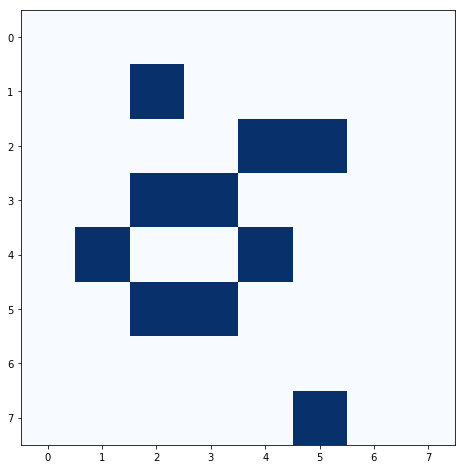

In [ ]:
# Feature selection using backward elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
tf = RFE(RandomForestClassifier(), n_features_to_select=10, verbose=1)
Xt = tf.fit_transform(X_train, y_train)
print("Shape =", Xt.shape)

# Plot support
plt.imshow(tf.get_support().reshape((8, 8)), interpolation="nearest", cmap=plt.cm.Blues)
plt.show()

### Dekomposition, Faktorisierung und Embeddings

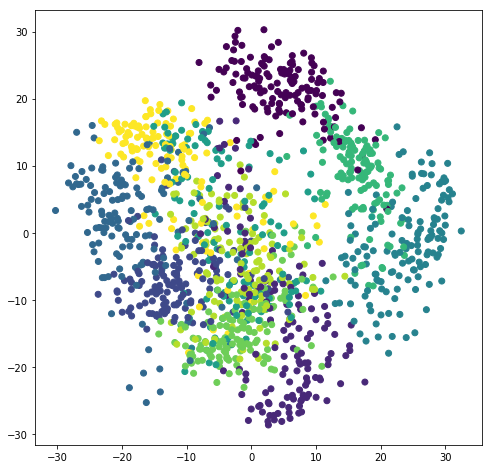

In [ ]:
# Berechne die Dekomposition
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
tf = PCA(n_components=2)
Xt_train = tf.fit_transform(X_train)

# Plot
plt.scatter(Xt_train[:, 0], Xt_train[:, 1], c=y_train)
plt.show()

# Siehe auch: KernelPCA, NMF, FastICA, Kernel approximations, 
#           manifold learning, etc.

### Function transformer

In [ ]:
from sklearn.preprocessing import FunctionTransformer

def increment(X):
    return X + 1

tf = FunctionTransformer(func=increment)
Xt = tf.fit_transform(X)
print(X[0])
print(Xt[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 1.  1.  6. 14. 10.  2.  1.  1.  1.  1. 14. 16. 11. 16.  6.  1.  1.  4.
 16.  3.  1. 12.  9.  1.  1.  5. 13.  1.  1.  9.  9.  1.  1.  6.  9.  1.
  1. 10.  9.  1.  1.  5. 12.  1.  2. 13.  8.  1.  1.  3. 15.  6. 11. 13.
  1.  1.  1.  1.  7. 14. 11.  1.  1.  1.]


## Pipelines

Transformers können hintereinander gesetzt werden zu einer Pipeline.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Chain transformers to build a new transformer
tf = make_pipeline(StandardScaler(), 
                   SelectKBest(score_func=f_classif, k=10))
tf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('selectkbest', SelectKBest(k=10, score_func=<function f_classif at 0x7f942806af28>))])

In [ ]:
Xt_train = tf.transform(X_train)
print("Mean =", np.mean(Xt_train))
print("Shape =", Xt_train.shape)

Mean = -1.3715004550677509e-17
Shape = (1347, 10)


In [ ]:
# Verfollständige die Pipeline mit einem neuen Klassifizierer
clf = make_pipeline(StandardScaler(), 
                    SelectKBest(score_func=f_classif, k=10), 
                    RandomForestClassifier())
clf.fit(X_train, y_train)
print(clf.predict_proba(X_test)[:5])

[[0.  0.  0.9 0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.1 0.  0.  0.  0.  0.  0.9 0. ]
 [0.  0.  0.9 0.1 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]]


In [ ]:
# Hyper-parameters können mit ihrem Namen (step name) ausgelesen werden
print("K =", clf.get_params()["selectkbest__k"])

K = 10


In [ ]:
clf.named_steps

{'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'selectkbest': SelectKBest(k=10, score_func=<function f_classif at 0x7f942806af28>),
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False)}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(clf, 
                    param_grid={"selectkbest__k": [1, 10, 20, 30, 40, 50],
                                "randomforestclassifier__max_features": [0.1, 0.25, 0.5]})
grid.fit(X_train, y_train)

print("Best params =", grid.best_params_)

Best params = {'randomforestclassifier__max_features': 0.25, 'selectkbest__k': 40}


## Feature unions


## Verschachtelte Komposition

Da pipelines and Vereinigungen (unions) selber estimators sind, kann man sie verschachteln.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_union
from sklearn.decomposition import PCA

clf = make_pipeline(
    # Build features
    make_union(
        FunctionTransformer(func=lambda X: X), # Identity
        PCA(),
    ), 
    # Select the best features
    RFE(RandomForestClassifier(), n_features_to_select=10),
    # Train
    MLPClassifier()
)

clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('functiontransformer', FunctionTransformer(accept_sparse=False,
          func=<function <lambda> at 0x7f94220ea048>, inv_kw_args=None,
          inverse_func=None, kw_args=None, pass_y='deprecated',
          validate=True)), ...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])